### Let's compute a Forward Euler approximation of the solution to the ODE

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
def Fwd_Euler(f, y0, t0, t1, dt):
    """
    f : function
        The function that defines the ODE (dy/dt = f(t, y)).
    y0 : float
        Initial condition for y at t0.
    t0 : float
        Initial time.
    t1 : float
        Final time.
    dt : float
        Time step size.
        
    Returns:
    t : list
        List of time points.
    y : list
        List of solution values at each time point.
    """
    # Initialize time and solution lists
    size =int((t1 - t0) / dt) + 1
    y = np.empty(size)
    t = np.empty(size)
    t[0] = t0
    y[0] = y0
    
    for i in range(1, size):
        y_new = y[i-1] + dt * f(t[i-1], y[i-1])
        t_new = t[i-1] + dt
        
        # Append new values to the lists
        t[i] = t_new
        y[i] = y_new
    
    return t, y

def slopefield(f,tinterval,yinterval,tstep,ystep):
    t = np.arange(tinterval[0],tinterval[1],tstep)
    y = np.arange(yinterval[0],yinterval[1],ystep)
    L = 0.7*min(tstep,ystep)
    for i in range(len(t)):
        for j in range(len(y)):
            slope = f(t[i],y[j])
            theta = np.arctan(slope)
            dy = L*np.sin(theta)
            dt = L*np.cos(theta)
            plt.plot([t[i],t[i] + dt],[y[j],y[j] + dy],'b')

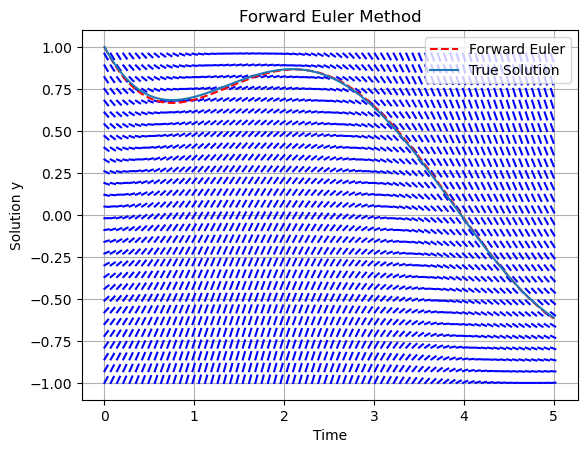

In [32]:
def f(t, y):
    return -y + np.sin(t)  # Example ODE: dy/dt = -y + sin(t)

y0 = 1  # Initial condition
t0 = 0  # Start time
t1 = 5  # End time
dt = .05  # Time step size
c = 0.5+ y0
true_soln = lambda t: (c*np.exp(-t)) + 0.5*( np.sin(t) - np.cos(t))  # True solution for comparison
times, soln = Fwd_Euler(f, y0, t0, t1, dt)
fine_times = np.linspace(t0, t1, 500)
slopefield(f,[t0,t1],[-1,1],0.07,0.07)
plt.plot(times, soln, 'r--', label='Forward Euler')
plt.plot(fine_times, true_soln(fine_times), label='True Solution')
plt.title("Forward Euler Method")
plt.xlabel("Time")
plt.ylabel("Solution y")
plt.grid()
plt.legend()
plt.show()


## Experiment with the step size to see how it affects the solution

```python

In [ ]:
## Your code here

### Try modifying the code above to plot the solution for multiple intial conditions on the slope field